In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import ipywidgets as widgets
import datetime
from IPython.display import display

In [38]:
dfemploee = pd.read_csv("emploee.txt")
dftimesheet1 = pd.read_csv("timesheet11.txt")
dftimesheet2 = pd.read_csv("timesheet12.txt")
dfcheck1 = pd.read_csv("check11.txt")
dfcheck2 = pd.read_csv("check12.txt")
dfservice = pd.read_csv("service.txt")
dftariff = pd.read_csv("tariff.txt")

In [39]:
dfemploee

,id_number,tariff class,surname
0,21,6,Bochka
1,23,7,Borovets
2,26,9,Korol


In [40]:
dftimesheet1

,id_number,date,hours
0,21,04/11/2022,32
1,23,05/11/2022,34
2,26,06/11/2022,36


In [41]:
dftimesheet2

,id_number,date,hours
0,21,04/12/2022,42
1,23,05/12/2022,44
2,26,06/12/2022,46


In [42]:
dfcheck1

,id_number,date,id_service
0,21,04/11/2022,1
1,23,05/11/2022,3
2,26,06/11/2022,2


In [43]:
dfcheck2

,id_number,date,id_service
0,21,04/12/2022,2
1,23,05/12/2022,1
2,26,06/12/2022,3


In [44]:
dfservice

,id_service,name,cost
0,1,coffe,20
1,2,tea,12
2,3,lunch,50


In [45]:
dftariff

,tariff class,payment
0,6,400
1,7,600
2,9,700


In [91]:
dfcheck=pd.concat([dfcheck1,dfcheck2])
dfcheck['date']=pd.to_datetime(dfcheck.date, format="%d/%m/%Y")
dfcheck['month']=dfcheck['date'].dt.month
dfcheck

,id_number,date,id_service,month
0,21,2022-11-04,1,11
1,23,2022-11-05,3,11
2,26,2022-11-06,2,11
0,21,2022-12-04,2,12
1,23,2022-12-05,1,12
2,26,2022-12-06,3,12


# а)

In [92]:
dftimesheet=pd.concat([dftimesheet1,dftimesheet2])
dftimesheet['date']=pd.to_datetime(dftimesheet.date, format="%d/%m/%Y")
dftimesheet['month']=dftimesheet['date'].dt.month

ds=dftimesheet.groupby('month').sum()
display(ds.drop("id_number", axis=1))

,hours
month,
11,102
12,132


# б)

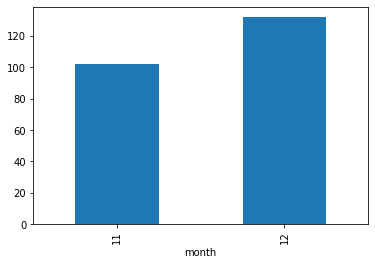

In [93]:
y=ds['hours'].plot(kind='bar')

# в), г)


In [48]:
df=dfemploee.merge(dftariff)
dt=df.merge(dftimesheet)
dt['salary']=dt['payment']*dt['hours']
#dt
dt=dt.groupby('id_number').sum().reset_index()
#print(dt)
ds=dfcheck.merge(dfservice)
ds=ds.groupby('id_number').sum().reset_index()
#print(ds)
dt=dt.merge(ds, on='id_number')
#print(dt)
dt=dt.merge(dfemploee, on='id_number')

dt=dt[['surname','salary','cost']]
dt['sum to payment']=dt['salary']-dt['cost']
dt


,surname,salary,cost,sum to payment
0,Bochka,29600,32,29568
1,Borovets,46800,70,46730
2,Korol,57400,62,57338


In [49]:
month=pd.concat([dfcheck.month,dftimesheet.month])
mnth=month.sort_values()
mnth

0    11
1    11
2    11
0    11
1    11
2    11
0    12
1    12
2    12
0    12
1    12
2    12
Name: month, dtype: int64

interactive(children=(SelectMultiple(description='interval', options=(11, 12), value=()), Output()), _dom_clas…

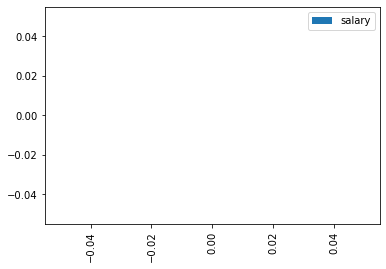

In [66]:
    
@widgets.interact(interval=widgets.SelectMultiple(options=mnth.unique()))
def f(interval):
    dffilter=dftimesheet['month'].isin(interval)
    df2=dftimesheet[dffilter]
    
    df=dfemploee.merge(dftariff)
    dt=df.merge(df2)
    dt['salary']=dt['payment']*dt['hours']
    #dt
    dt=dt.groupby('id_number').sum().reset_index()
    #print(dt)
    dffilter=dfcheck['month'].isin(interval)
    df3=dfcheck[dffilter]
    ds=df3.merge(dfservice)
    ds=ds.groupby('id_number').sum().reset_index()
    
    dt=dt.merge(ds, on='id_number')
    #print(dt)
    dt=dt.merge(dfemploee, on='id_number')

    dt=dt[['surname','salary','cost']]
    dt['sum to payment']=dt['salary']-dt['cost']
    dt
    ax=dt.plot(x='surname',y='salary',color='g',kind='bar')
    dt.plot(x='surname',y='cost',kind='bar')
    dt.plot(x='surname',y='sum to payment',kind='bar')
    
    print(dt)
   
    return 
### Через Ctrl + ЛКМ вобираємо місяці які цікавлять

# д)

In [88]:
df=dfcheck.merge(dfservice)
df
df=df.groupby('name').sum().reset_index()
df=df[['name', 'cost']]

# е)

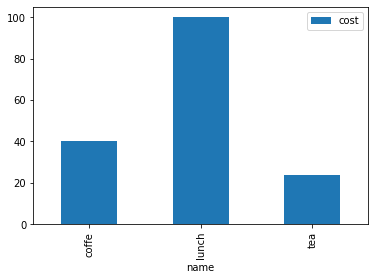

In [90]:
y=df.plot(x='name',y='cost',kind='bar')